In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root

In [2]:
#For Backward pass ( known parameters are mdot, M2, P02,T02)

#Calculate downstream static pressure (P2)

def main_nozzle_backward(P02, T02, mdot,M, d_orifice, d_upstream_pipe,y, Mw_gas):    
    A_o= (np.pi*d_orifice**2/4) #Area of orifice
    A_p= (np.pi*d_upstream_pipe**2/4) #Area of pipe 

    Cd= 0.61 #Coefficient of discharge, It will be less than 1
    #y= 1.4  gamma value changes with the type of gas and conditions
    #g=9.81 #gravitational constant
    R= 8.3145
    _Mw_gas = Mw_gas #since input in grams, if in kg remove this
    _R=R/_Mw_gas
    B = np.sqrt (A_o/A_p) 
    
    P_02=P02
    T_02=T02
    _m=mdot
    
    P_2=stat_P(P_02,M,y) #these equatiions need Mach number
    T_2=stat_T(T_02,M,y)


    #Calculating critical upstream static pressure P_1c
    P_2c= P_2 # according to wikipedia static pressure downstream is considered critical 
    P_1c = P_2c*(2/(y+1))**(-y/(y-1)) #critical pressure calculated for upstream (but this is consdiered as stagnation in formula)
    #But further equations compare P_1c to static pressures, this is a confusion
    
    #method 1
    #_P_1= stag_up(_m, A_p, A_o, P_2, Cd, y, M)
    
    #method2
    T_0= T_02
    _P_1= P1backward(_m,P_2,A_p, A_o, T_0, Cd, y,Mw_gas) # why this has 1 term less? Because the mach number is already included in T_0 calculation done prior
    
    if (_P_1<= P_1c):  #Unchoked condition
        P_1=_P_1
        P_01 = P_02 + P_1 - P_2
    else:  #choked condition
        P_1 = P_1c # or should it be directly the stagnation pressure?
        P_01 = P_02 + P_1 - P_2
    return [P_1,P_01]
    
    
def stag_up(m, P_2, A_1, A, Cd, y, M):
    #Unchocked upstream static pressure direct method
    _m=m
    rho1=_m/(A_1*M*c)
    _B=A/A_1
    P_1 = Symbol('P_1')
    _P_1 =solve(Cd*(1-(0.333+1.145*(_B**2+0.7*_B**5+ 12*_B**13))*(P_1-P_2)/(y*P_1))*A*(2*rho1*(P_1-P_2))**0.5-_m, P_1)
    return _P_1
    
# Calculation of unchoked upstream static pressure in terms of rho1

def P1backward (m,P_2, A_1, A, T_0, Cd, y,Mw_gas): #Stagnation temperature T_0, upstream or downstream? My view: Upstream, since rho is for upstream
    
    R=8.3145
    _Mw_gas=Mw_gas
    _R=R/_Mw_gas
    _m=m
    _P_2=P_2
    G = (y-1)/(2*y)*(_m/A_1)**2  # A_1 is area of upstream section
    D = _m**2/(A_1**2*y*_R*T_0) # T_0 is stagnation pressure at inlet
    C_A= Cd*A # where A is effective area of throttling device
    def equation(rho1):
        #print ((2*g*(rho1**2*_R*T_0-G-rho1*P_2))**0.5) #the part under square root.
        return (-(_m/(C_A*(2*(rho1**2*_R*T_0-G-rho1*_P_2))**0.5))+(1-D/y*(1-_P_2/(rho1*_R*T_0-G/rho1))))
    rho1= root(equation, 30)
    print ('rho1=',rho1,'error=', equation(rho1))
    #print (_P_2, equation(_P_2))

    _P_1 = rho1*_R*T_0-(y-1)/(2*y)*(_m**2/A_1)*1/rho1
    # _P_1 = rho1*_R*T_0-(y-1)/(2*g*y)*(_m**2/A_1)*1/rho1
    print ('P1 upstream =',_P_1)
    return _P_1

def stat_P (P0, M, y):
    P_0=P0
    P_stat= P0/(1+(y-1)/2*M**2)**(y/(y-1))
    return P_stat

def stat_T(T0, M, y):
    T_0=T0
    T_stat= T_0/(1+(y-1)/2 *M**2)
    return T_stat

main_nozzle_backward(110000, 320, 0.005,0.4,0.006,0.06,1.4,0.028)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in sqrt


TypeError: unsupported operand type(s) for ** or pow(): 'OptimizeResult' and 'int'

In [3]:
R=8.3145
_Mw_gas=0.028
_R=R/_Mw_gas
_m=0.005
_P_2=110000
y=1.4
A = np.pi * 0.006**2/4.0
A_1 = np.pi * 0.025**2/4.0
T_0 = 320
Cd = 0.6
G = (y-1)/(2*y)*(_m/A_1)**2  # A_1 is area of upstream section
D = _m**2/(A_1**2*y*_R*T_0) # T_0 is stagnation pressure at inlet
C_A= Cd*A # where A is effective area of throttling device
def equation(rho1):
    #print ((2*g*(rho1**2*_R*T_0-G-rho1*P_2))**0.5) #the part under square root.
    return (-(_m/(C_A*(2*(rho1**2*_R*T_0-G-rho1*_P_2))**0.5))+(1-D/y*(1-_P_2/(rho1*_R*T_0-G/rho1))))#,(2*(rho1**2*_R*T_0-G-rho1*_P_2))

In [4]:
G,D

(14.821841721393405, 0.0007799092853580632)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


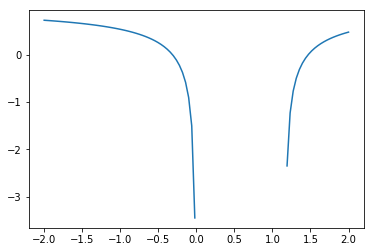

0.9764806532818413

In [5]:
rho = np.linspace(-2,2,100)
plt.plot(rho,equation(rho))
plt.show()
equation(30)

In [16]:
initialVal = 20
a = root(equation,initialVal,method='krylov')
while a['x']<0 or a['success']==False:
    initialVal = initialVal + 1
    a = root(equation,10,method='krylov')
print(a['x'])

1.468957048024211


In [15]:
root(equation,2,method='krylov')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


     fun: array([0.47887367])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 200
  status: 2
 success: False
       x: array(2.)